In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn.linear_model import LinearRegression

%matplotlib inline



In [32]:
x = np.arange(25)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

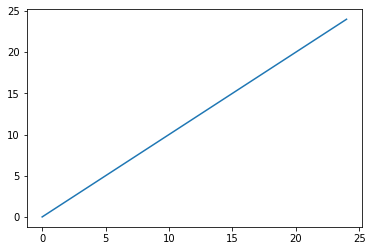

In [33]:
plt.plot(x)

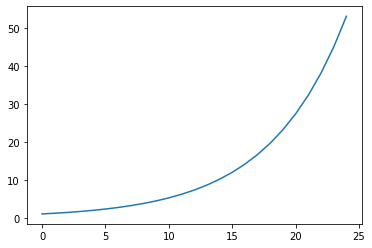

In [34]:
plt.plot(x, 1*np.power(1.18, x ))

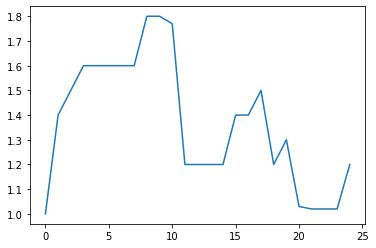

In [35]:
gr = np.array([1, 1.4, 1.5, 1.6, 1.6, 1.6, 1.6, 1.6, 1.8, 1.8, 1.77, 1.2, 1.2, 1.2, 1.2, 1.4, 1.4, 1.5, 1.2, 1.3, 1.03, 1.02, 1.02, 1.02, 1.2])
plt.plot(x, 1*gr)

In [36]:

def apply_growth_rates(start_value, growth_rates):
    growth_applied = np.zeros(len(growth_rates))
    growth_applied[0] = start_value;
    for i in range(len(gr)-1):
        growth_applied[i+1] = growth_applied[i]*growth_rates[i+1]
    return growth_applied




### Movig average implementation

```mov_avg``` is my custom implementation of moving average and its used to smooth-out values by averaging them over neighbouring values. ```seq``` parameter tells the function which values to take into account calculating the avg

```apply_window_to_index``` is used to pad sequence for edge cases (like ```index=0``` etc)

In [37]:
def apply_window_to_index(index, size,  seq):
    if (index + seq[0]) < 0:
        return seq + (index - seq[0])
    seq_last = seq[len(seq)-1]
    if (index + seq_last) > size-1:
        return seq + (size - 1 - (index + seq_last))
    return seq


In [38]:
def moving_avg(values, avg_seq):
    m_avg = np.zeros(len(values))
    for i in range(len(values)):
        seq_appl = apply_window_to_index(i, len(values), avg_seq)
        sum_to_avg = 0
        for j in seq_appl:
            sum_to_avg = sum_to_avg + values[i+j]
        m_avg[i] =  sum_to_avg/len(avg_seq)
    return m_avg
            
        

To better understand ```apply_window_to_index```  here are some examples

In [39]:
 
print(apply_window_to_index(18, 20, np.array([-2,-1,0,1,2])))
print(apply_window_to_index(0, 20, np.array([-2,-1,0,1,2])))
print(apply_window_to_index(5, 20, np.array([-2,-1,0,1,2])))

[-3 -2 -1  0  1]
[0 1 2 3 4]
[-2 -1  0  1  2]


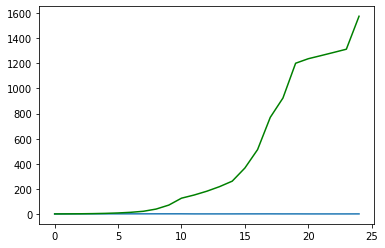

In [40]:
plt.plot(x, gr)    
plt.plot(x, apply_growth_rates(1, gr), 'g')
plt.show()

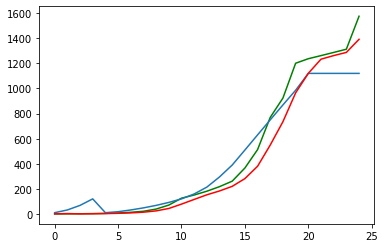

In [41]:
growth_rates_applied = apply_growth_rates(1, gr)
plt.plot(x, growth_rates_applied, 'g')
plt.plot(x, moving_avg(growth_rates_applied,np.array([-4,-3,-2,-1,0,1,2,3,4]) ))
plt.plot(x, moving_avg(growth_rates_applied,np.array([-2,-1,0]) ), 'r')

In [42]:
ex1 = np.array([-2,-1,0,1,2])

In [43]:
ex1+5

array([3, 4, 5, 6, 7])

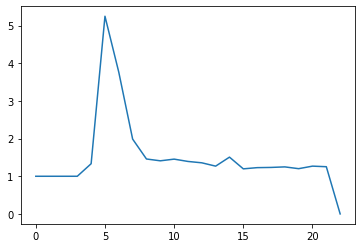

In [44]:
numbers_it = np.array([3,3,3,3,3,4,21,79,157,229,323,470,655,889,1128,1701,2036,2502,3089,3858,4636,5883,7375])
growth_rates_it = np.zeros(len(numbers_it))

for i in range(len(growth_rates_it)-1):
    growth_rates_it[i] = numbers_it[i+1]/numbers_it[i]
    

plt.plot(growth_rates_it)

In [80]:
data_series = read_csv('covid_19_data.csv', header=0, parse_dates=['ObservationDate'])
countries_data = data_series.filter(['ObservationDate', 'Country/Region', 'Confirmed'])

countries_data_pl = countries_data[ countries_data['Country/Region'] == 'Poland']
countries_data_cz = countries_data[ countries_data['Country/Region'] == 'Czech Republic']
countries_data_de = countries_data[ countries_data['Country/Region'] == 'Germany']
countries_data_it = countries_data[ countries_data['Country/Region'] == 'Italy']

italy_confirmed = countries_data_it.filter(['Confirmed'])
italy_confirmed_np  = italy_confirmed.to_numpy()[:-1,0]
poland_confirmed = countries_data_pl.filter(['Confirmed'])
poland_confirmed_np = poland_confirmed.to_numpy()[:-1,0]
germany_confirmed_np = countries_data_de.filter(['Confirmed']).to_numpy()[:-1,0]
czech_confirmed_np = countries_data_cz.filter(['Confirmed']).to_numpy()[:-1,0]

In [81]:
italy_confirmed_np

array([2.00000e+00, 2.00000e+00, 2.00000e+00, 2.00000e+00, 2.00000e+00,
       2.00000e+00, 2.00000e+00, 3.00000e+00, 3.00000e+00, 3.00000e+00,
       3.00000e+00, 3.00000e+00, 3.00000e+00, 3.00000e+00, 3.00000e+00,
       3.00000e+00, 3.00000e+00, 3.00000e+00, 3.00000e+00, 3.00000e+00,
       3.00000e+00, 2.00000e+01, 6.20000e+01, 1.55000e+02, 2.29000e+02,
       3.22000e+02, 4.53000e+02, 6.55000e+02, 8.88000e+02, 1.12800e+03,
       1.69400e+03, 2.03600e+03, 2.50200e+03, 3.08900e+03, 3.85800e+03,
       4.63600e+03, 5.88300e+03, 7.37500e+03, 9.17200e+03, 1.01490e+04,
       1.24620e+04, 1.24620e+04, 1.76600e+04, 2.11570e+04, 2.47470e+04,
       2.79800e+04, 3.15060e+04, 3.57130e+04, 4.10350e+04, 4.70210e+04,
       5.35780e+04, 5.91380e+04, 6.39270e+04, 6.91760e+04, 7.43860e+04,
       8.05890e+04, 8.64980e+04, 9.24720e+04, 9.76890e+04, 1.01739e+05,
       1.05792e+05, 1.10574e+05, 1.15242e+05, 1.19827e+05, 1.24632e+05,
       1.28948e+05, 1.32547e+05, 1.35586e+05, 1.39422e+05, 1.436

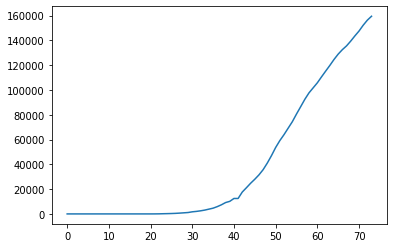

In [82]:
plt.plot(italy_confirmed_np)

In [83]:
growth_rates_it = np.zeros(len(italy_confirmed_np))
for i in range(len(growth_rates_it)-1):
    growth_rates_it[i] = italy_confirmed_np[i+1]/italy_confirmed_np[i]

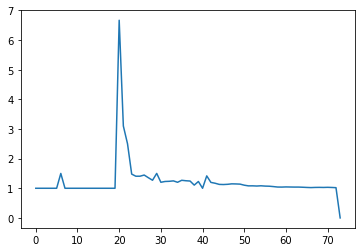

In [84]:
plt.plot(growth_rates_it)

In [85]:
growth_rates_it[40:]

array([1.        , 1.41710801, 1.19801812, 1.16968379, 1.1306421 ,
       1.12601858, 1.13353012, 1.14902136, 1.14587547, 1.13944833,
       1.10377394, 1.08098008, 1.08210928, 1.07531514, 1.08338935,
       1.07332266, 1.06906518, 1.05641708, 1.0414581 , 1.03983723,
       1.04520191, 1.04221607, 1.03978584, 1.04009948, 1.03462995,
       1.02791048, 1.02292772, 1.02829201, 1.03015306, 1.02750895,
       1.03180712, 1.02687314, 1.02016462, 0.        ])

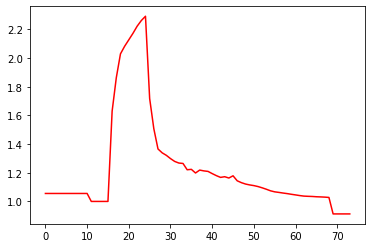

In [86]:
plt.plot(moving_avg(growth_rates_it,np.array([-4,-3,-2,-1,0,1,2,3,4]) ), 'r')

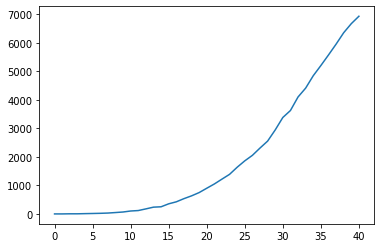

In [87]:
plt.plot(poland_confirmed_np)

In [88]:
days = np.arange(len(italy_confirmed_np))

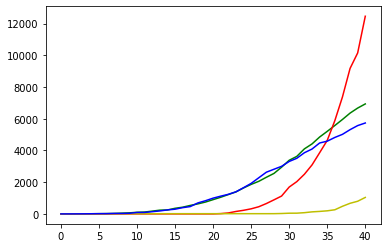

In [90]:
plt.plot(np.arange(len(poland_confirmed_np)), poland_confirmed_np, 'g')
plt.plot(np.arange(len(poland_confirmed_np)), italy_confirmed_np[0:len(poland_confirmed_np)],'r')
plt.plot(np.arange(len(poland_confirmed_np)), germany_confirmed_np[0:len(poland_confirmed_np)],'y')
plt.plot(np.arange(len(poland_confirmed_np)), czech_confirmed_np[0:len(poland_confirmed_np)],'b')




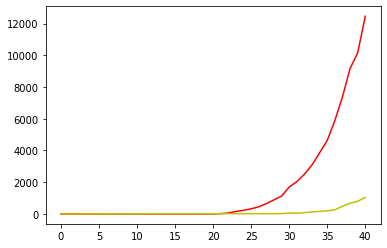

In [91]:
plt.plot(np.arange(len(poland_confirmed_np)), italy_confirmed_np[0:len(poland_confirmed_np)],'r')
plt.plot(np.arange(len(poland_confirmed_np)), germany_confirmed_np[0:len(poland_confirmed_np)],'y')

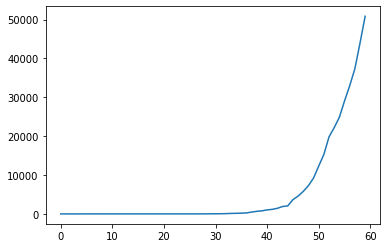

In [94]:
plt.plot(germany_confirmed_np[0:60])

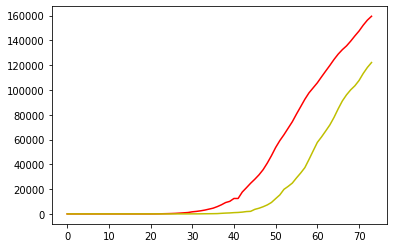

In [96]:
plt.plot(np.arange(len(italy_confirmed_np)), italy_confirmed_np[0:len(italy_confirmed_np)],'r')
plt.plot(np.arange(len(italy_confirmed_np)), germany_confirmed_np[0:len(italy_confirmed_np)],'y')

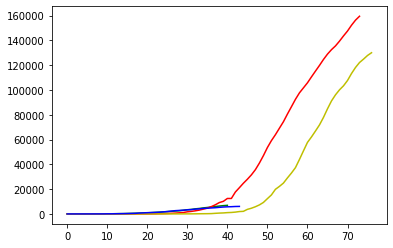

In [97]:
plt.plot(np.arange(len(poland_confirmed_np)), poland_confirmed_np, 'g')
plt.plot(np.arange(len(italy_confirmed_np)), italy_confirmed_np,'r')
plt.plot(np.arange(len(germany_confirmed_np)), germany_confirmed_np,'y')
plt.plot(np.arange(len(czech_confirmed_np)), czech_confirmed_np, 'b')

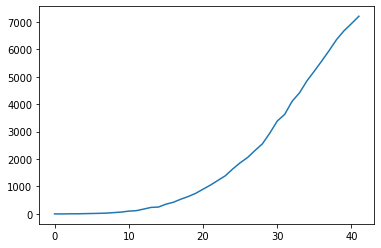

In [115]:
app = np.append(poland_confirmed_np, 7202, 7582)
plt.plot(app)

In [114]:
poland_confirmed_np[-1]

6934.0